In [1]:
import pandas as pd

data = pd.read_csv("2002-2018-property-sales-data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34523 entries, 0 to 34522
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PropType      34520 non-null  object 
 1   Taxkey        34523 non-null  int64  
 2   Address       34523 non-null  object 
 3   CondoProject  6656 non-null   object 
 4   District      34523 non-null  int64  
 5   Nbhd          34523 non-null  int64  
 6   Style         34517 non-null  object 
 7   Extwall       24624 non-null  object 
 8   Stories       34523 non-null  float64
 9   Year_Built    34523 non-null  int64  
 10  Nr_of_rms     34523 non-null  int64  
 11  Fin_sqft      34523 non-null  int64  
 12  Units         34523 non-null  int64  
 13  Bdrms         34523 non-null  int64  
 14  Fbath         34523 non-null  int64  
 15  Hbath         34523 non-null  int64  
 16  Lotsize       34523 non-null  int64  
 17  Sale_date     34523 non-null  object 
 18  Sale_price    34523 non-nu

In [2]:
data.isna().sum()

PropType            3
Taxkey              0
Address             0
CondoProject    27867
District            0
Nbhd                0
Style               6
Extwall          9899
Stories             0
Year_Built          0
Nr_of_rms           0
Fin_sqft            0
Units               0
Bdrms               0
Fbath               0
Hbath               0
Lotsize             0
Sale_date           0
Sale_price          0
dtype: int64

In [ ]:
data = data.drop(columns=["CondoProject", "Extwall"])
data = data.dropna()

In [4]:
data_cat = data.select_dtypes(include="object")
data_cat.head()

,PropType,Address,Style,Sale_date
0,Commercial,2628 N 6TH ST,Commercial Exempt,2002-01
1,Commercial,1363 N PROSPECT AV,Mansions With Commercial Usage,2002-01
2,Commercial,617 S 94TH ST,Service Building,2002-01
3,Commercial,3624 W SILVER SPRING DR,"Store Bldg - Multi Story (Store & Apt, Store & O",2002-01
4,Commercial,3830 W LISBON AV,"Store Bldg - Multi Story (Store & Apt, Store & O",2002-01


In [5]:
data_cat.nunique()

PropType         5
Address      26842
Style          386
Sale_date      204
dtype: int64

In [6]:
data["PropType"].value_counts()

PropType
Residential     24634
Condominium      5709
Commercial       2922
Lg Apartment     1017
Vacant Land       232
Name: count, dtype: int64

In [7]:
data = data[(data["PropType"] == "Residential") | (data["PropType"] == "Commercial")]

In [8]:
data["PropType"] = data["PropType"].apply(lambda x: 1 if x == "Residential" else 0)
data["PropType"].value_counts()

PropType
1    24634
0     2922
Name: count, dtype: int64

In [9]:
data["Address_engineered"] = data["Address"].str[-2:]
data["Address_engineered"].value_counts()

Address_engineered
ST    17129
AV     7222
PL      964
DR      702
BL      435
CT      390
RD      373
PK      100
LA       76
TR       74
CR       53
WA       21
Y        16
L         1
Name: count, dtype: int64

In [10]:
top_address = ["L ", "Y ", "WA", "CR", "TR", "LA"]
data["Address_engineered"] = data["Address_engineered"].apply(
    lambda x: x if x not in top_address else "not_common_address"
)
data["Address_engineered"].value_counts()

Address_engineered
ST                    17129
AV                     7222
PL                      964
DR                      702
BL                      435
CT                      390
RD                      373
not_common_address      241
PK                      100
Name: count, dtype: int64

In [11]:
data_to_1hot = data["Address_engineered"]
data_to_1hot = pd.get_dummies(data_to_1hot).astype("int")
data_to_1hot.head()

,AV,BL,CT,DR,PK,PL,RD,ST,not_common_address
0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0


In [12]:
data = data.drop(columns=["Address", "Address_engineered"])
data = pd.concat([data, data_to_1hot], axis=1)

In [13]:
data["Style"].value_counts()

Style
Ranch                                          7412
Cape Cod                                       5159
Residence O/S                                  2805
Milwaukee Bungalow                             1971
Colonial                                       1640
                                               ... 
Svc Station wo Conv Store                         1
Svc Station w Conv and Restaurant                 1
Super Regional Shopping Center                    1
**                                                1
Svc Station w Conv, Carwash, and Restaurant       1
Name: count, Length: 99, dtype: int64

In [14]:
col = "Style"
top_5_style = [
    "Ranch",
    "Cape Cod",
    "Residence O/S",
    "Milwaukee Bungalow",
    "Colonial",
]
data[col] = data[col].apply(lambda x: x if x in top_5_style else "not_common_style")
data[col].value_counts()

Style
not_common_style      8569
Ranch                 7412
Cape Cod              5159
Residence O/S         2805
Milwaukee Bungalow    1971
Colonial              1640
Name: count, dtype: int64

In [15]:
data_to_1hot = data["Style"]
data_to_1hot = pd.get_dummies(data_to_1hot).astype("int")
data_to_1hot.head()

,Cape Cod,Colonial,Milwaukee Bungalow,Ranch,Residence O/S,not_common_style
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1


In [16]:
data = data.drop(columns=["Style"])
data = pd.concat([data, data_to_1hot], axis=1)

In [17]:
data["Sale_date"] = pd.to_datetime(data["Sale_date"], errors="coerce")

data["sale_year"] = data["Sale_date"].dt.year
data["sale_month"] = data["Sale_date"].dt.month
data = data.drop(columns=["Sale_date"])
data[["sale_year", "sale_month"]].head()

,sale_year,sale_month
0,2002,1
1,2002,1
2,2002,1
3,2002,1
4,2002,1


In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [20]:
X.isna().sum()

Taxkey                0
District              0
Nbhd                  0
Stories               0
Year_Built            0
Nr_of_rms             0
Fin_sqft              0
Units                 0
Bdrms                 0
Fbath                 0
Hbath                 0
Lotsize               0
Sale_price            0
AV                    0
BL                    0
CT                    0
DR                    0
PK                    0
PL                    0
RD                    0
ST                    0
not_common_address    0
Cape Cod              0
Colonial              0
Milwaukee Bungalow    0
Ranch                 0
Residence O/S         0
not_common_style      0
sale_year             0
sale_month            0
dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

print(importance_df)

               Feature    Importance
2                 Nbhd  3.330858e-01
8                Bdrms  2.132852e-01
9                Fbath  1.903034e-01
28           sale_year  8.368687e-02
6             Fin_sqft  5.276965e-02
27    not_common_style  4.453752e-02
11             Lotsize  2.374355e-02
7                Units  1.734612e-02
12          Sale_price  1.427423e-02
3              Stories  9.987582e-03
10               Hbath  6.574178e-03
4           Year_Built  5.048293e-03
25               Ranch  1.735179e-03
22            Cape Cod  7.331164e-04
0               Taxkey  7.118504e-04
1             District  5.502121e-04
13                  AV  5.195985e-04
23            Colonial  4.678090e-04
26       Residence O/S  3.680804e-04
20                  ST  8.108237e-05
14                  BL  6.753071e-05
29          sale_month  4.943520e-05
18                  PL  3.202772e-05
19                  RD  2.576542e-05
16                  DR  1.121810e-05
21  not_common_address  3.874667e-06
1

In [22]:
X = X.drop(
    columns=["Milwaukee Bungalow", "PK", "Nr_of_rms", "CT", "not_common_address"]
)

In [23]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=123)

In [24]:
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(
    class_weight="balanced", classes=np.unique(ytrain), y=ytrain
)

class_weight_dict = dict(enumerate(class_weights))

In [25]:
from keras import layers, models, callbacks

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

model = models.Sequential(
    [
        layers.Input(shape=(xtrain.shape[1],)),
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

model.fit(
    xtrain,
    ytrain,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weight_dict,
    callbacks=[early_stopping],
    verbose=True,
)

Epoch 1/100
552/552 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9412 - loss: 0.2326 - val_accuracy: 0.9991 - val_loss: 0.0058
Epoch 2/100
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9982 - loss: 0.0059 - val_accuracy: 0.9998 - val_loss: 0.0014
Epoch 3/100
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9998 - loss: 0.0019 - val_accuracy: 0.9998 - val_loss: 8.3717e-04
Epoch 4/100
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9999 - loss: 8.6324e-04 - val_accuracy: 0.9998 - val_loss: 7.5837e-04
Epoch 5/100
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9996 - loss: 8.6263e-04 - val_accuracy: 0.9998 - val_loss: 4.9316e-04
Epoch 6/100
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9998 - loss: 4.6552e-04 - val_accuracy: 0.9998 - val_loss: 4.6375e-04
Epoch 7/100
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9997 - loss: 5.2751e-04 - val_accuracy: 1.0000 - val_loss: 1.0226e-04
Epoch 8/100
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accura

In [ ]:
model.save("best_model.keras")
model_loaded = models.load_model("best_model.keras")

In [27]:
test_loss, test_accuracy = model_loaded.evaluate(xtest, ytest)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 1.0000 - loss: 2.9719e-05
Test loss: 0.000667207408696413
Test accuracy: 0.9998185634613037


173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step


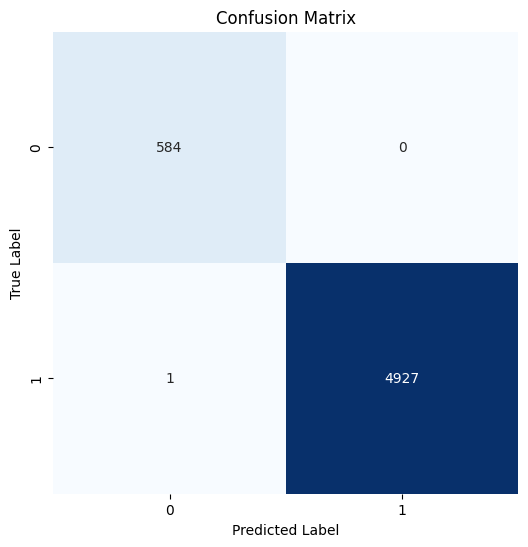

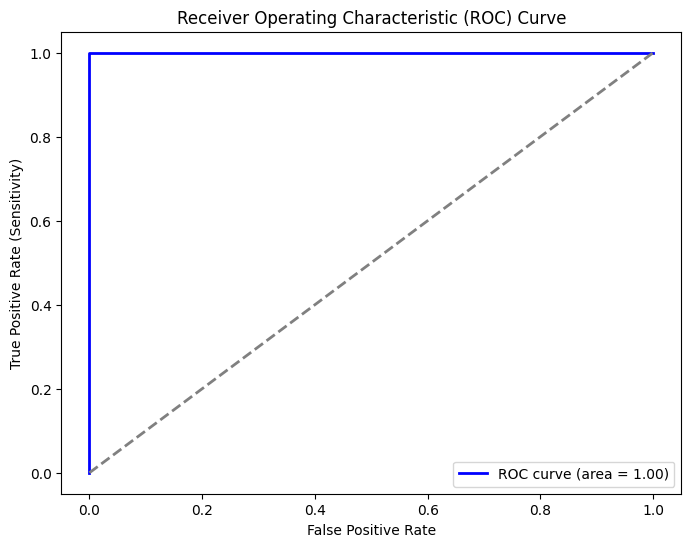

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model_loaded.predict(xtest)
y_pred_class = (y_pred > 0.5).astype("int32")

conf_matrix = confusion_matrix(ytest, y_pred_class)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, thresholds = roc_curve(ytest, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()